# DTEK0042 Exercise 3
    Group Members:
    1. Tiina Nokelainen
    2. Risto Hirvilammi
    3. Oskari Läntinen

*** Note for Google Colab Users ***

---


     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.


     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data)
         
         

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PPG_data = np.loadtxt("/content/drive/My Drive/Biosignals/PPG_record.txt", delimiter=",")
PPG_data.shape

(43404, 4)

In [ ]:
# Store IR signal to variable PPG_sig
# PPG signal is reflected
PPG_sig = PPG_data[:,2]*-1
# time variable in seconds
time = np.linspace(0,(len(PPG_sig)/132),len(PPG_sig))

Text(0.5, 1.0, 'PPG signal vs time')

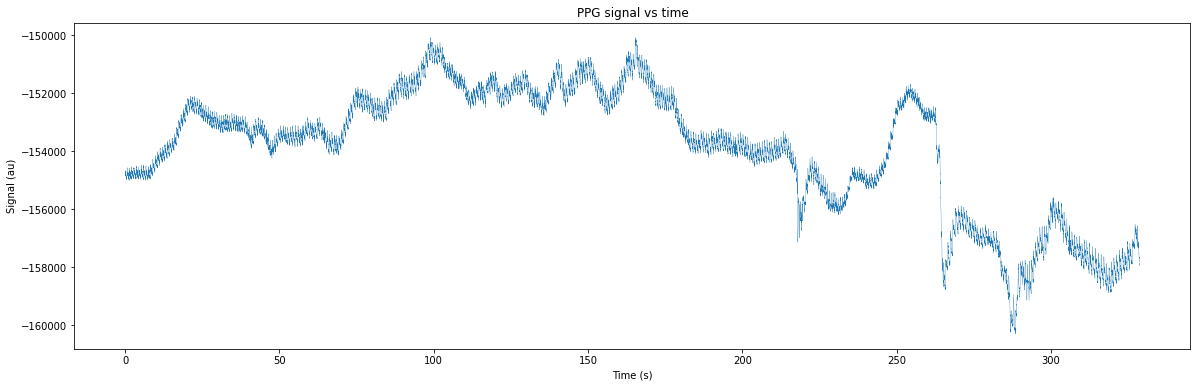

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(time, PPG_sig, linewidth=0.3);
plt.xlabel('Time (s)')
plt.ylabel('Signal (au)')
plt.title("PPG signal vs time")

Text(0.5, 1.0, 'PPG signal vs time')

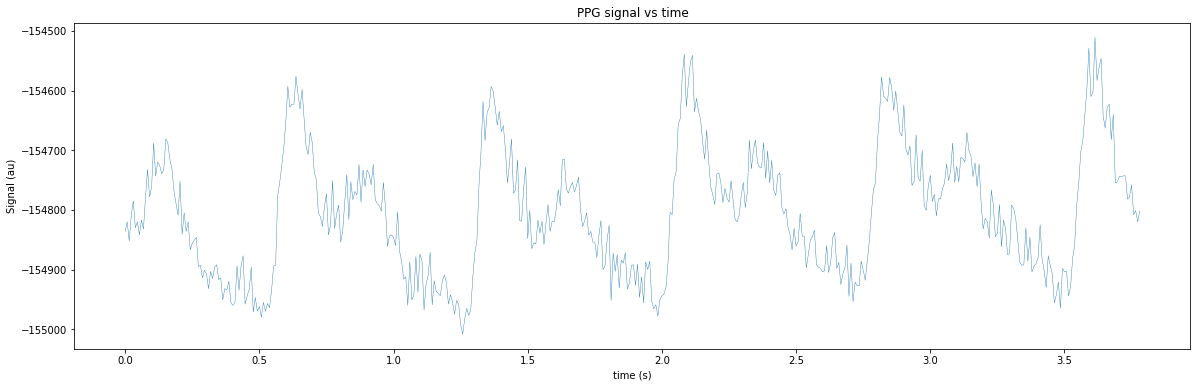

In [ ]:
# shorter segment of previous plot to show the shape of peaks

plt.figure(figsize=(20,6))
plt.plot(time[:500], PPG_sig[:500], linewidth=0.4);
plt.xlabel('time (s)')
plt.ylabel('Signal (au)')
plt.title("PPG signal vs time")

# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Take only the frequencies between 0.7 and 3Hz since the human heart rate cannot go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Report the value of the dominant_freq variable
 * Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 

In [ ]:
from scipy import signal

Text(0.5, 1.0, 'PSD vs frequency')

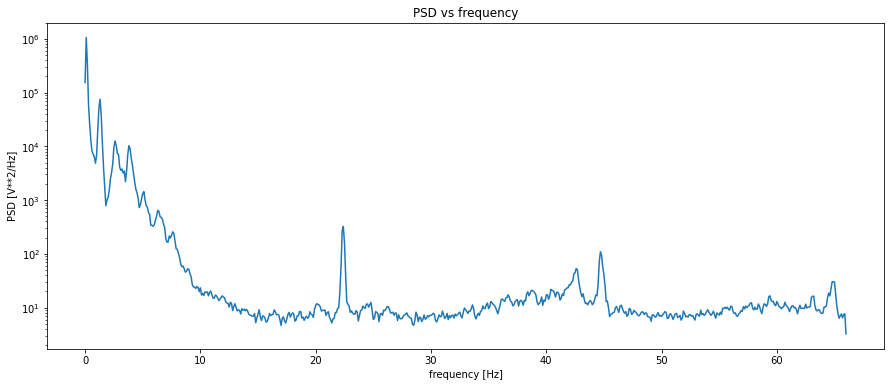

In [ ]:
fs = 132
PSD_freqs, PSD = scipy.signal.welch(PPG_sig, fs=132, nperseg=1320)

# plot
plt.figure(figsize=(15,6))
plt.semilogy(PSD_freqs, PSD)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]');
plt.title("PSD vs frequency")

Text(0.5, 1.0, 'PSD vs frequency (0.7 - 3 Hz)')

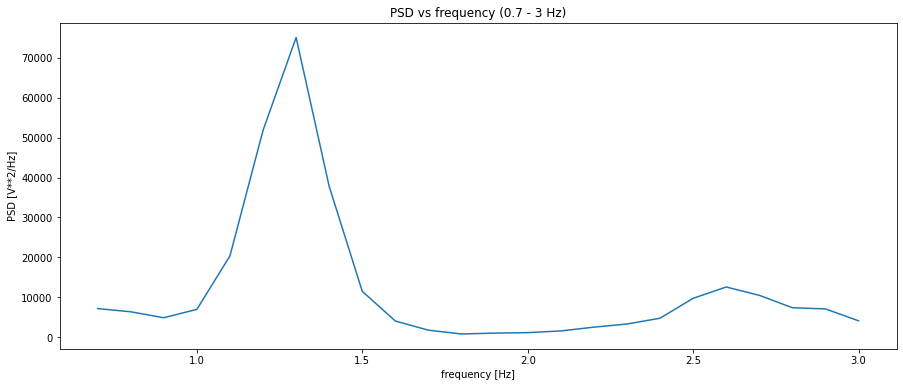

In [ ]:
# Zoomed to 0.7-3.0 Hz
plt.figure(figsize=(15,6))
plt.plot(PSD_freqs[(PSD_freqs >= 0.7) & (PSD_freqs <= 3)], PSD[(PSD_freqs >= 0.7) & (PSD_freqs <= 3)])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]');
plt.title("PSD vs frequency (0.7 - 3 Hz)")

In [ ]:
# print frequencies between PSD 0.7 and 3
PSD_freqs[(PSD_freqs >= 0.7) & (PSD_freqs <= 3.0)]

array([0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
       2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ])

In [ ]:
import pandas as pd

In [ ]:
freqs_df = pd.DataFrame({'PSD': PSD})
freqs_df.index = PSD_freqs

# dominant frequency between 0.7 - 3 Hz
dominant_freq = freqs_df[0.7:3].idxmax().values[0]
print("The dominant frequenzy is", dominant_freq, "Hz")


The dominant frequenzy is 1.3 Hz


# Observations

Dominant frequency of 1.3 Hz means that heart rate is ~78 bpm


# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the output which is a signal showing heartbeats in the form of a sinusoid

* Describe your observations 


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easilty follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

In [ ]:
from scipy import signal

In [ ]:
def bandPassFilter(signal, order, dom_freq):

  fs = 132
  lowcut = dom_freq - 0.3
  highcut = dom_freq + 0.3
  
  # maximum frequency is Nyquist frequency which his half of the sampling freq
  nyq = 0.5 * fs
  low = lowcut / nyq
  high = highcut / nyq

  b, a = scipy.signal.butter(order, [low, high], btype='band', analog=False)
  filt_signal = scipy.signal.filtfilt(b, a, signal, axis=0)

  return filt_signal

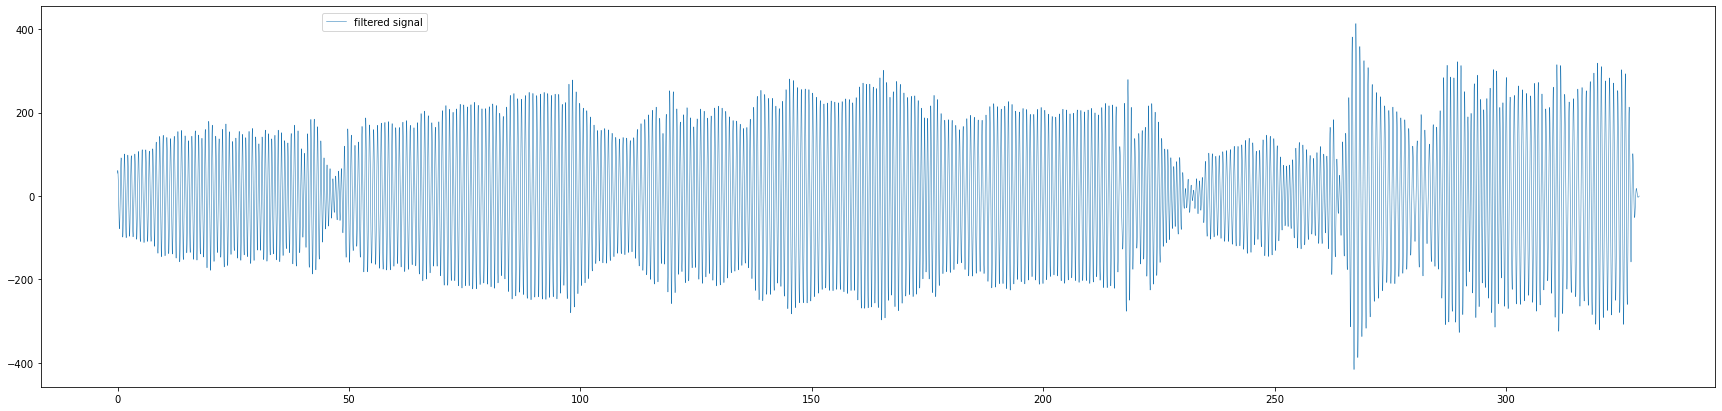

In [ ]:
dominant_freq = 1.3
#dominant_freq = 2.1
filt_ppg = bandPassFilter(PPG_sig, 4, dominant_freq)

time2 = np.linspace(0,(len(filt_ppg)/132),len(filt_ppg))

fig = plt.figure(figsize=(30,7)) 
#plt.plot(PPG_sig, label="raw signal", linewidth=1)
plt.plot(time2, filt_ppg, label="filtered signal", linewidth=0.5)
fig.legend(bbox_to_anchor=(0.20,0.8));


## Observations:
   ?? something is wrong with the filter? wrong dominant freq??

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

In [ ]:
 from scipy.signal import argrelextrema
 import statistics as stat

In [ ]:
peaks = argrelextrema(filt_ppg, np.greater)
RR_intervals_s = np.diff(peaks[0])

avg_peak_intervals = stat.mean(RR_intervals_s)
print("Peaks are on average", avg_peak_intervals, "measurement points apart")

# converting RR_intervals to seconds
RR_intervals = [item/132 for item in RR_intervals_s]

avg_peak_intervals = stat.mean(RR_intervals)
print("In seconds that would be", round(avg_peak_intervals, 2))


heartRate = round(60.0/avg_peak_intervals,1)
print("And that would be", heartRate, "bpm")

Peaks are on average 100 measurement points apart
In seconds that would be 0.76
And that would be 78.4 bpm


## Observations: 
    78.4 bpm sounds like a probable resting heart rate, in line with earlier obseravations of 78 bpm

# 6- Calculate SDNN and RMSSD
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals)
* RMSSD is the Root mean square of successive RR interval differences

* SDNN = standard deviation (RR_intervals)
* RMSSD = root mean squared(difference between successive RR_intervals)
* Calculate SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Implement SDNN and RMSSD in code and report the SDNN and RMSSD values. 
* reference link for RMSSD: https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

    HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        


In [ ]:
# isntall and import package for heart rate variability analysis
#!pip install hrv-analysis
# from hrvanalysis import get_time_domain_features

In [ ]:
# time_domain_features = get_time_domain_features(RR_intervals_t)
# print("RMSSD is", round(time_domain_features["rmssd"],3))
# print("SDNN is", round(time_domain_features["sdnn"],3))

In [ ]:
RR_intervals = np.array(RR_intervals)

print("SDNN is", np.std(RR_intervals_s))
print("RMSSD is", np.sqrt(np.mean(RR_intervals_s**2)))

SDNN is 8.560663105707896
RMSSD is 101.3203394625738


## Observations:
    (Describe your observations here)